<a href="https://colab.research.google.com/github/fahminanursalma/fahminanursalma.github.io/blob/main/Ensemble_model_OS_fingerprinting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ensemble learning achitecture.

Ensemble learning is a machine learning technique that involves combining multiple individual models (often called base models or weak learners) to make more accurate predictions or decisions.



In [1]:
import pandas as pd
from google.colab import files

# Uploading the CSV file
uploaded = files.upload()



Saving labeled_dataset (2).csv to labeled_dataset (2) (1).csv


In [4]:
# Load the dataset
dataraw = pd.read_csv('/content/labeled_dataset (2).csv')

In [ ]:
dataraw.head()

,ip.version,ip.hdr_len,ip.id,ip.flags,ip.flags.rb,ip.flags.df,ip.flags.mf,ip.frag_offset,ip.ttl,ip.proto,...,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,tcp.flags.urg,tcp.flags.cwr,tcp.window_size,tcp.checksum,tcp.urgent_pointer,os
0,4.0,20.0,0x00000f79,0x00000040,0.0,1.0,0.0,0.0,128.0,6.0,...,1.0,0.0,0.0,0.0,0.0,0.0,8192.0,0x0000aca1,0.0,Win 10
1,4.0,20.0,0x00000f7a,0x00000040,0.0,1.0,0.0,0.0,128.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,66048.0,0x00003692,0.0,Win 10
2,4.0,20.0,0x00000f7b,0x00000040,0.0,1.0,0.0,0.0,128.0,6.0,...,0.0,0.0,1.0,1.0,0.0,0.0,66048.0,0x00009fb2,0.0,Win 10
3,4.0,20.0,0x00000f7c,0x00000040,0.0,1.0,0.0,0.0,128.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,66048.0,0x00002a58,0.0,Win 10
4,4.0,20.0,0x00000f7d,0x00000040,0.0,1.0,0.0,0.0,128.0,6.0,...,0.0,0.0,1.0,1.0,0.0,0.0,65280.0,0x00002d45,0.0,Win 10


In [76]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming X is your feature matrix and y is your target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an empty set of selected features
selected_features = []

# Iterate over the features
while len(selected_features) < X_train.shape[1]:
    best_feature = None
    best_score = -np.inf

    # Iterate over the remaining features
    for feature in range(X_train.shape[1]):
        if feature not in selected_features:
            # Add the feature to the selected features
            current_features = selected_features + [feature]

            # Train a model using the selected features
            model = LinearRegression()
            model.fit(X_train[:, current_features], y_train)

            # Evaluate the model performance
            score = model.score(X_test[:, current_features], y_test)

            # Check if the current feature improves the model performance
            if score > best_score:
                best_feature = feature
                best_score = score

    # Add the best feature to the selected features
    selected_features.append(best_feature)

# Print the selected features
print("Selected Features:", selected_features)


Selected Features: [5, 11, 14, 3, 0, 16, 12, 15, 13, 1, 18, 8, 6, 2, 4, 9, 7, 10, 19, 17]


In [83]:
import pandas as pd

# Create a sample DataFrame
df = pd.read_csv("/content/labeled_dataset (2) (1).csv")

# Select specific columns using iloc
selected_columns = df.iloc[:, [0, 2]]  # Select columns at positions 0 and 2

print(selected_columns)

       ip.version       ip.id
0             4.0  0x00000f79
1             4.0  0x00000f7a
2             4.0  0x00000f7b
3             4.0  0x00000f7c
4             4.0  0x00000f7d
...           ...         ...
48957         4.0  0x000078f1
48958         4.0  0x0000d434
48959         4.0  0x0000666b
48960         4.0  0x0000202f
48961         4.0  0x00007724

[48962 rows x 2 columns]


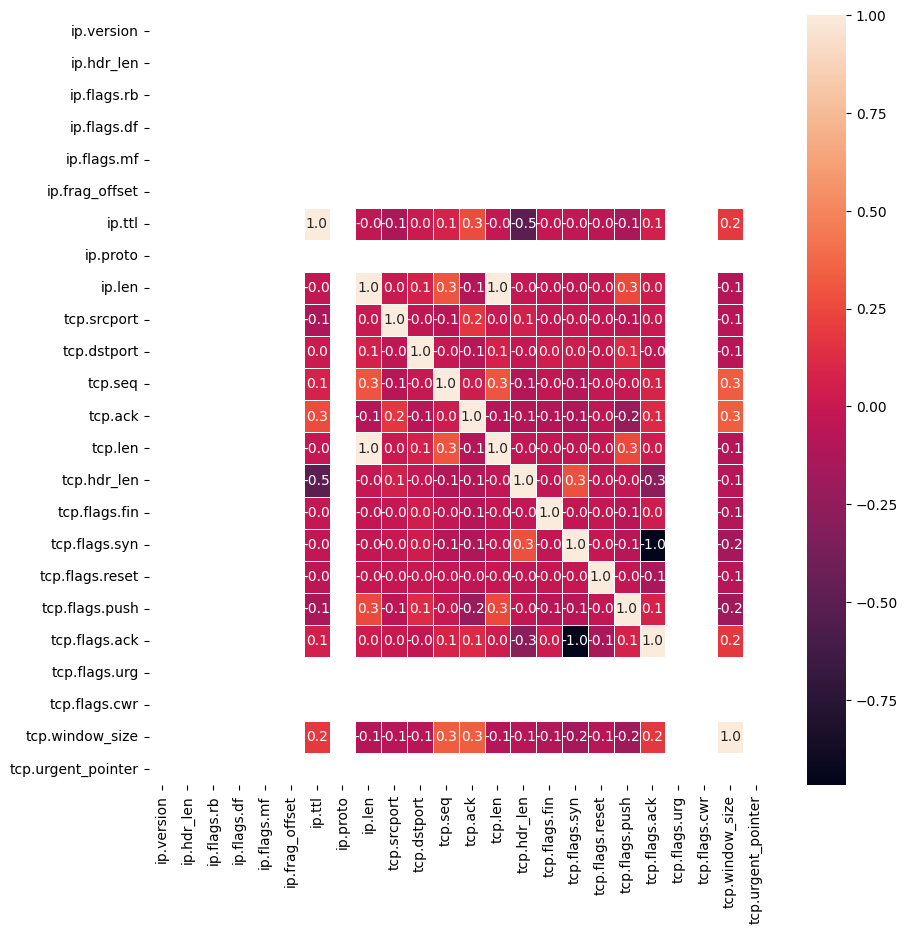

In [85]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, fmt='.1f', ax=ax)
plt.show()

<Axes: ylabel='ip.len'>

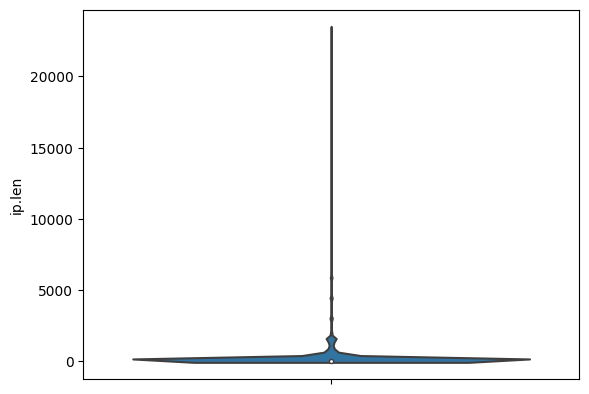

In [86]:
sns.violinplot(y='ip.len', data=df)

<Axes: ylabel='tcp.ack'>

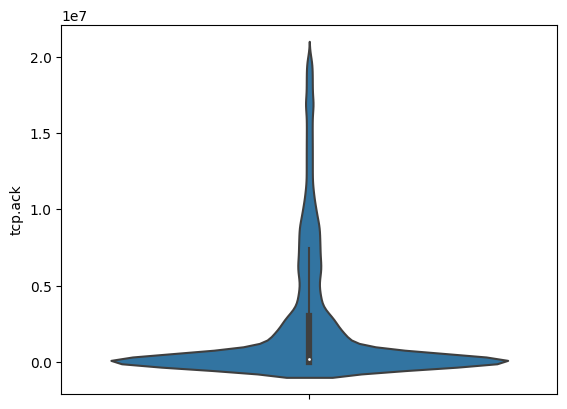

In [87]:
sns.violinplot(y='tcp.ack',data=df)

<Axes: ylabel='tcp.flags.ack'>

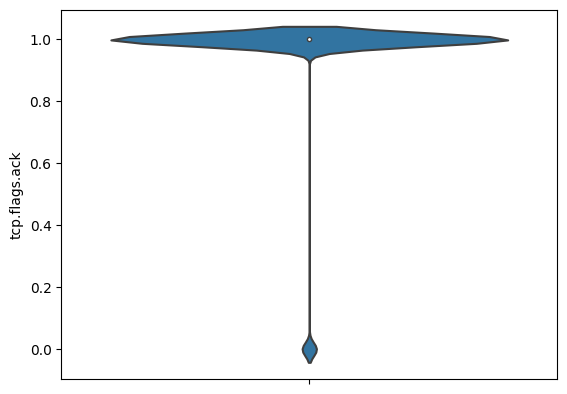

In [88]:
sns.violinplot(y='tcp.flags.ack',data=df)

<Axes: ylabel='tcp.flags.reset'>

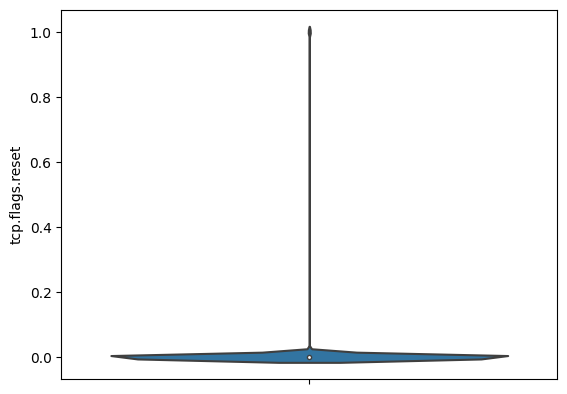

In [89]:
sns.violinplot(y='tcp.flags.reset',data=df)

<Axes: ylabel='tcp.dstport'>

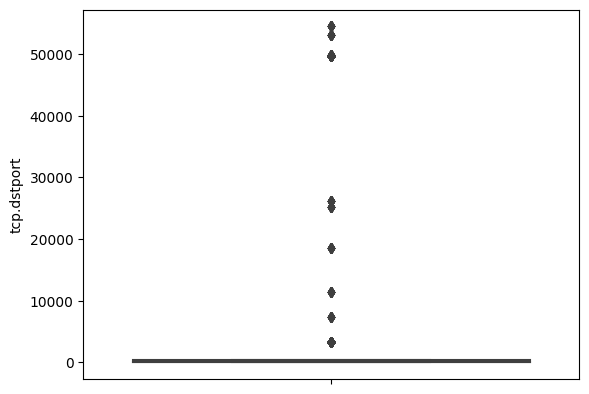

In [91]:
sns.boxplot(y='tcp.dstport',data=df)

<Axes: ylabel='tcp.flags.fin'>

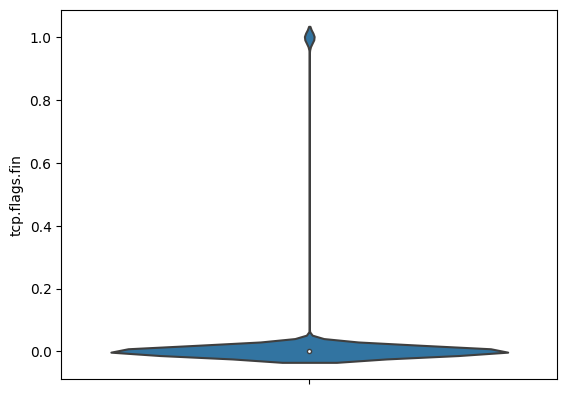

In [94]:
sns.violinplot(y='tcp.flags.fin',data=df)

numerical encoding of the data

In [5]:
# Select the columns to encode (excluding the label column)
columns_to_encode = dataraw.columns[:-1]

# Numerically encode the selected columns
for column in columns_to_encode:
    dataraw[column] = pd.factorize(dataraw[column])[0]

# Save the encoded dataset to a new CSV file
dataraw.to_csv('encoded_dataset.csv', index=False)

In [6]:
data = pd.read_csv('/content/encoded_dataset.csv')

In [7]:


# Split the data into features (X) and labels (y)
X = data.iloc[:, :-1]  # Features (all columns except the last one)
y = data.iloc[:, -1]   # Labels (last column)




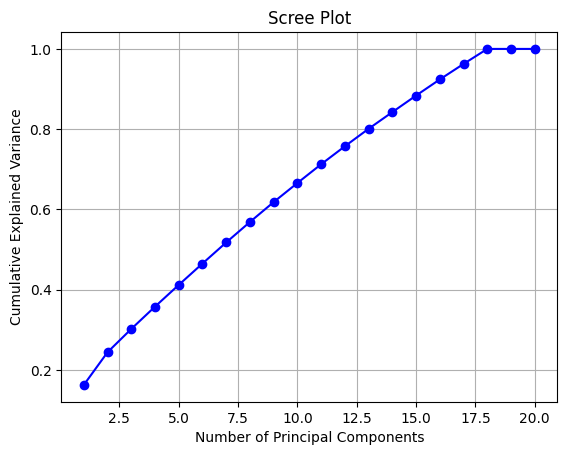

In [9]:
#Feature extraction using PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification

# Generate a sample dataset (replace with your own data)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Scree plot
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()


In [10]:
#use PCA extracted  values for X
X = X_pca
# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [43]:
pca = PCA(n_components=10)  # Specify the number of components you want to keep
rf = RandomForestClassifier(n_estimators=100)


In [44]:
pipeline = Pipeline([('pca', pca), ('rf', rf)])


In [45]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('pca', PCA(n_components=10)),
                ('rf', RandomForestClassifier())])

In [47]:
y_pred = pipeline.predict(X_test)


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA


In [50]:
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)


In [51]:
pca = PCA()
X_pca = pca.fit_transform(X)

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_pca, y)


RandomForestClassifier()

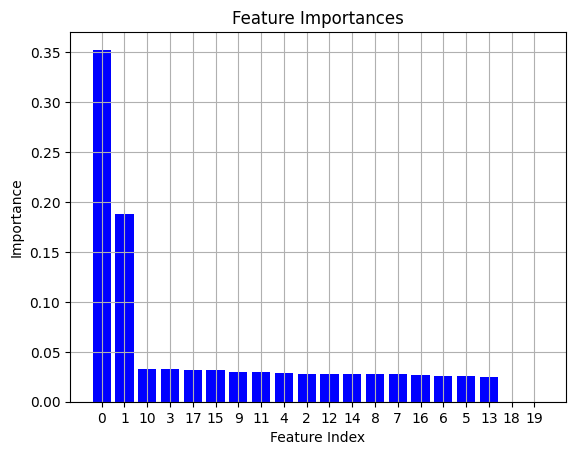

In [52]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.bar(range(X.shape[1]), importances[indices], color='b', align='center')
plt.xticks(range(X.shape[1]), indices)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.grid(True)
plt.show()


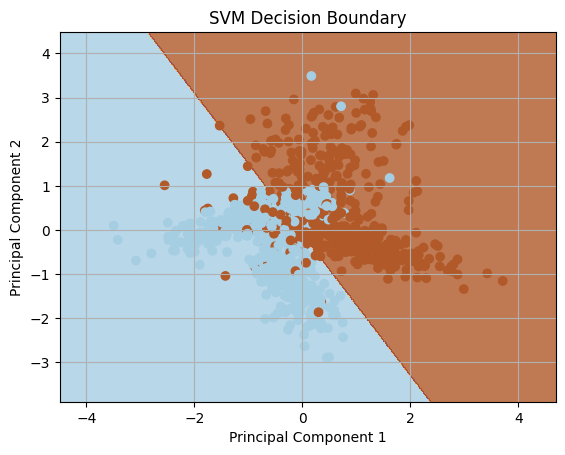

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Generate a sample dataset (replace with your own data)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Perform PCA
pca = PCA(n_components=2)  # Specify the number of components you want to keep
X_pca = pca.fit_transform(X)

# Scale the PCA-transformed data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Create an SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_scaled, y)

# Plotting the decision boundary
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary')
plt.grid(True)
plt.show()


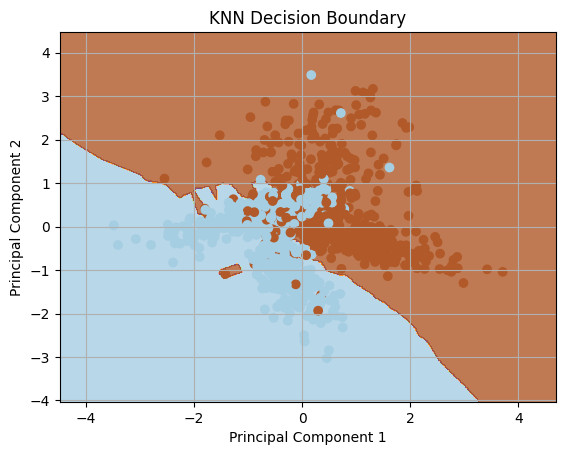

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Generate a sample dataset (replace with your own data)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Perform PCA
pca = PCA(n_components=2)  # Specify the number of components you want to keep
X_pca = pca.fit_transform(X)

# Scale the PCA-transformed data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

# Plotting the decision boundary
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KNN Decision Boundary')
plt.grid(True)
plt.show()



Accuracy: 0.975


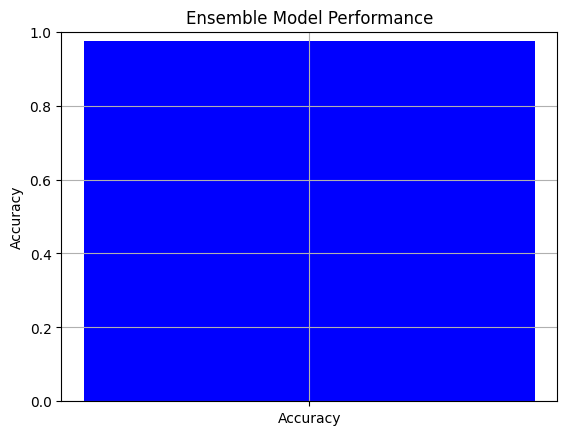

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Generate a sample dataset (replace with your own data)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Create individual base classifiers
svm = SVC(kernel='linear')
dt = DecisionTreeClassifier()
mlp = MLPClassifier()

# Create a multimodal ensemble model
ensemble = VotingClassifier(estimators=[('svm', svm), ('dt', dt), ('mlp', mlp)], voting='hard')
ensemble.fit(X_pca, y)

# Perform predictions using the ensemble model
y_pred = ensemble.predict(X_pca)

# Calculate accuracy
accuracy = np.mean(y_pred == y)
print(f"Accuracy: {accuracy}")

# Plotting the accuracy
plt.bar(['Accuracy'], [accuracy], color='b')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Ensemble Model Performance')
plt.grid(True)
plt.show()


Mean Squared Error: 5.095105445774764e-29


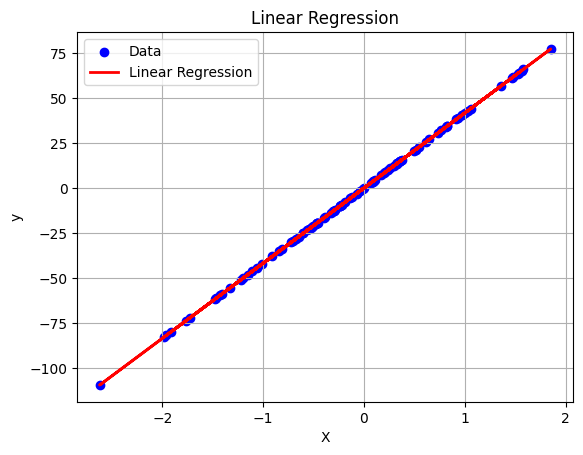

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# Generate a sample dataset (replace with your own data)
X, y = make_regression(n_samples=100, n_features=1, random_state=42)

# Create a linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Perform predictions
y_pred = regression_model.predict(X)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the data points and regression line
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


base model initialization

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Initialize the base models
model1 = DecisionTreeClassifier()
model2 = RandomForestClassifier()
model3 = SVC()
model4 = MLPClassifier()


 Combine the base models using the VotingClassifier ensemble method, which aggregates the predictions from each model and selects the majority vote as the final prediction.

In [12]:
from sklearn.ensemble import VotingClassifier

# Create the ensemble
ensemble = VotingClassifier(estimators=[('dt', model1), ('rf', model2), ('svm', model3), ('mlp', model4)], voting='hard')


Create ensemble for random forest classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


In [26]:
model1 = RandomForestClassifier(n_estimators=100, max_depth=5)
model2 = RandomForestClassifier(n_estimators=50, max_depth=10)
model3 = RandomForestClassifier(n_estimators=200, max_depth=3)


In [28]:
ensemble = VotingClassifier(estimators=[('rf1', model1), ('rf2', model2), ('rf3', model3)], voting='hard')


In [29]:
ensemble.fit(X_train, y_train)


VotingClassifier(estimators=[('rf1', RandomForestClassifier(max_depth=5)),
                             ('rf2',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=50)),
                             ('rf3',
                              RandomForestClassifier(max_depth=3,
                                                     n_estimators=200))])

In [31]:
y_pred = ensemble.predict(X_test)


train

In [32]:
# Train the ensemble model
ensemble.fit(X_train, y_train)

# Predict the labels for the testing data
predictions = ensemble.predict(X_test)



In [33]:
predictions = ensemble.predict(X_test)

evaluate model accuracy

In [34]:
# Evaluate the accuracy of the ensemble model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.825


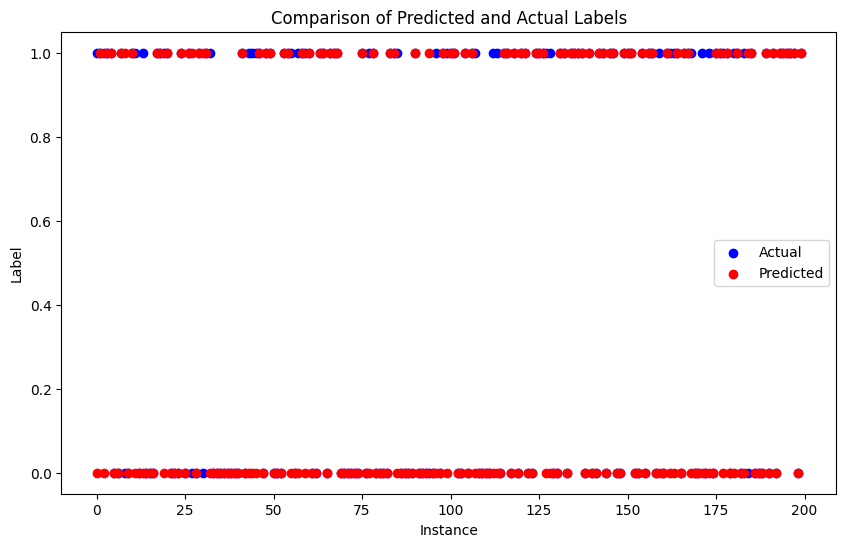

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already trained your ensemble model and obtained the predicted labels and actual labels
predicted_labels = ensemble.predict(X_test)
actual_labels = y_test

# Create a plot comparing predicted labels with actual labels
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(actual_labels)), actual_labels, color='blue', label='Actual')
plt.scatter(np.arange(len(predicted_labels)), predicted_labels, color='red', label='Predicted')
plt.xlabel('Instance')
plt.ylabel('Label')
plt.title('Comparison of Predicted and Actual Labels')
plt.legend()
plt.show()


Confusion Matrix
The resulting plot will display the confusion matrix, with the true labels on the y-axis and the predicted labels on the x-axis. The values within the matrix represent the counts of true positives, true negatives, false positives, and false negatives

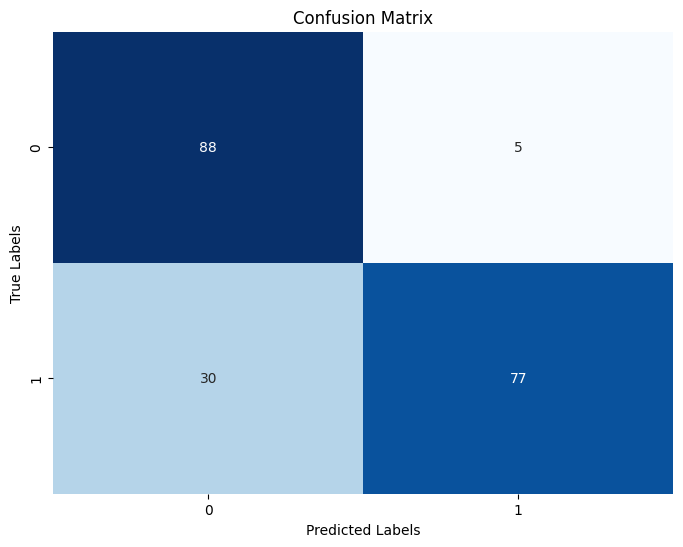

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# true labels r stored in a variable called 'y_tesr' and the predicted labels in 'predictions'
# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a figure for the confusion matrix
plt.figure(figsize=(8, 6))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)

# Customize the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Confusion matrix for random Forest

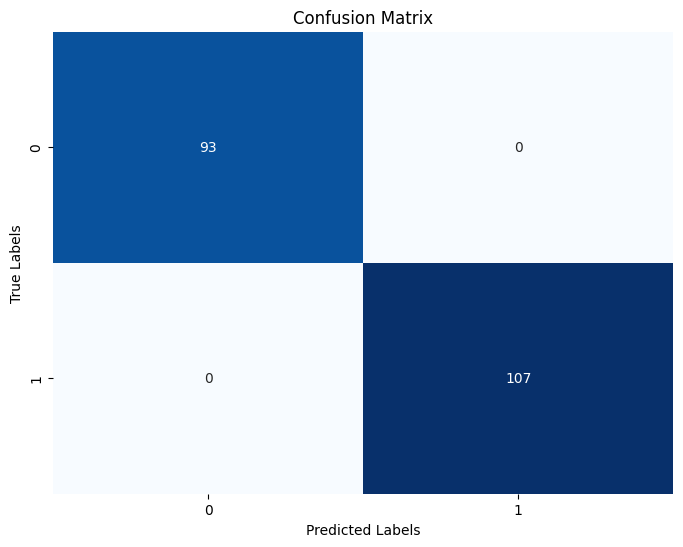

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Assuming you have a trained random forest classifier 'rf' and test data 'X_test' and 'y_test'

# Perform predictions using the random forest classifier
predictions = rf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a figure for the confusion matrix
plt.figure(figsize=(8, 6))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)

# Customize the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


COnfusion Matrix code for SVM

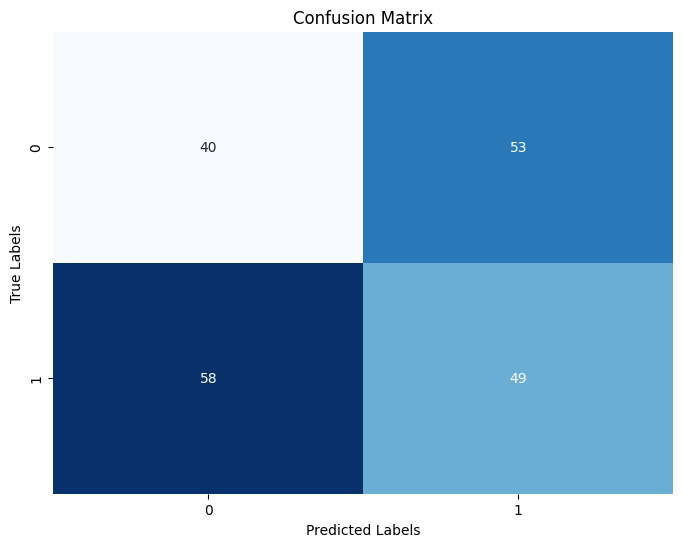

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

# Assuming you have a trained SVM classifier 'svm' and test data 'X_test' and 'y_test'

# Perform predictions using the SVM classifier
predictions = svm.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a figure for the confusion matrix
plt.figure(figsize=(8, 6))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)

# Customize the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Confusion Matrix code for KNN

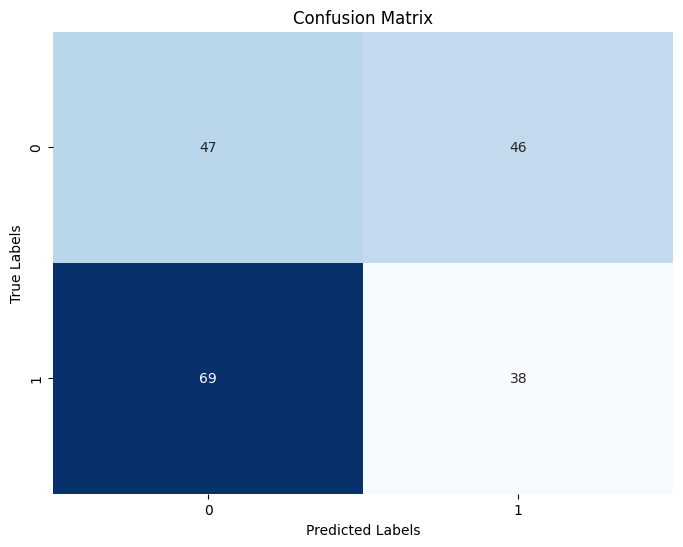

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have a trained KNN classifier 'knn' and test data 'X_test' and 'y_test'

# Perform predictions using the KNN classifier
predictions = knn.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a figure for the confusion matrix
plt.figure(figsize=(8, 6))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)

# Customize the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Measuring OS utilization


In [37]:
!pip install psutil


In [38]:
import psutil


current CPU utilization  and memory usage functions

In [39]:
import psutil
import time

# Function to measure CPU utilization
def measure_cpu_utilization():
    cpu_percent = psutil.cpu_percent(interval=1)
    return cpu_percent

# Function to measure memory usage
def measure_memory_usage():
    memory_info = psutil.virtual_memory()
    memory_percent = memory_info.percent
    return memory_percent


In [40]:


start_time = time.time()
# Run the ensemble algorithm
predictions = ensemble.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution Time: {execution_time} seconds")

# Measure CPU utilization
cpu_utilization = measure_cpu_utilization()
print(f"CPU Utilization: {cpu_utilization}%")

# Measure memory usage
memory_usage = measure_memory_usage()
print(f"Memory Usage: {memory_usage}%")


Execution Time: 0.11944437026977539 seconds
CPU Utilization: 78.9%
Memory Usage: 10.2%


In [68]:
import time
import psutil
from sklearn.svm import SVC

start_time = time.time()

# Assuming you have a trained SVM classifier 'svm' and test data 'X_test'

# Run the SVM algorithm
predictions = svm.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution Time: {execution_time} seconds")

# Measure CPU utilization
cpu_utilization = psutil.cpu_percent()
print(f"CPU Utilization: {cpu_utilization}%")

# Measure memory usage
memory_usage = psutil.virtual_memory().percent
print(f"Memory Usage: {memory_usage}%")


Execution Time: 0.02066659927368164 seconds
CPU Utilization: 13.6%
Memory Usage: 14.0%


In [69]:
import time
import psutil
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()

# Assuming you have a trained random forest classifier 'rf' and test data 'X_test'

# Run the random forest algorithm
predictions = rf.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution Time: {execution_time} seconds")

# Measure CPU utilization
cpu_utilization = psutil.cpu_percent()
print(f"CPU Utilization: {cpu_utilization}%")

# Measure memory usage
memory_usage = psutil.virtual_memory().percent
print(f"Memory Usage: {memory_usage}%")


Execution Time: 0.022586822509765625 seconds
CPU Utilization: 11.8%
Memory Usage: 14.0%


In [70]:
import time
import psutil
from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()

# Assuming you have a trained KNN classifier 'knn' and test data 'X_test'

# Run the KNN algorithm
predictions = knn.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution Time: {execution_time} seconds")

# Measure CPU utilization
cpu_utilization = psutil.cpu_percent()
print(f"CPU Utilization: {cpu_utilization}%")

# Measure memory usage
memory_usage = psutil.virtual_memory().percent
print(f"Memory Usage: {memory_usage}%")


Execution Time: 0.020853042602539062 seconds
CPU Utilization: 13.5%
Memory Usage: 14.0%


In [71]:
import time
import psutil

start_time = time.time()

# Assuming you have a trained multimodal ensemble model 'ensemble' and test data 'X_test'

# Run the multimodal ensemble model
predictions = ensemble.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution Time: {execution_time} seconds")

# Measure CPU utilization
cpu_utilization = psutil.cpu_percent()
print(f"CPU Utilization: {cpu_utilization}%")

# Measure memory usage
memory_usage = psutil.virtual_memory().percent
print(f"Memory Usage: {memory_usage}%")


Execution Time: 0.04246234893798828 seconds
CPU Utilization: 13.4%
Memory Usage: 14.1%


In [73]:
from sklearn.linear_model import LinearRegression

# Assuming you have training data 'X_train' and corresponding target labels 'y_train'

# Create and train the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


LinearRegression()

In [74]:
import time
import psutil
from sklearn.linear_model import LinearRegression

start_time = time.time()

# Assuming you have a trained linear regression model 'linear_reg' and test data 'X_test'

# Run the linear regression model
predictions = linear_reg.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution Time: {execution_time} seconds")

# Measure CPU utilization
cpu_utilization = psutil.cpu_percent()
print(f"CPU Utilization: {cpu_utilization}%")

# Measure memory usage
memory_usage = psutil.virtual_memory().percent
print(f"Memory Usage: {memory_usage}%")


Execution Time: 0.0026063919067382812 seconds
CPU Utilization: 14.2%
Memory Usage: 14.2%


Exporting the model